In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from common_func import plot_decision_regions
import seaborn as sns

In [55]:
#データ読み込み
df_ks = pd.read_csv("ks-projects-201801.csv", nrows=1000)[['country','goal','pledged','state','backers']]
df_ks['state'] = df_ks['state'] == 'successful'

#質量変数をダミー変数に変換
df_ks = pd.get_dummies(df_ks)

display(df_ks)
df_ks.describe()

,goal,pledged,state,backers,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,...,country_HK,country_IE,country_IT,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_US
0,1000.0,0.00,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,2421.00,False,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,220.00,False,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,1.00,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,19500.0,1283.00,False,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,52375.00,True,224,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1000.0,1205.00,True,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,25000.0,453.00,False,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,125000.0,8233.00,False,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,65000.0,6240.57,False,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,goal,pledged,backers,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,...,country_HK,country_IE,country_IT,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_US
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.748608e+04,1.663106e+04,123.652000,0.002000,0.015000,0.002000,0.037000,0.001000,0.010000,0.002000,...,0.003000,0.003000,0.008000,0.007000,0.010000,0.002000,0.003000,0.001000,0.004000,0.785000
std,1.189795e+05,1.541350e+05,570.856078,0.044699,0.121613,0.044699,0.188856,0.031623,0.099549,0.044699,...,0.054717,0.054717,0.089129,0.083414,0.099549,0.044699,0.054717,0.031623,0.063151,0.411028
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+03,4.000000e+01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000e+03,8.555000e+02,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.500000e+04,4.799500e+03,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000e+06,4.236618e+06,12758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


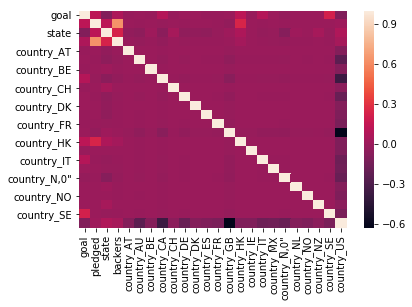

In [56]:
df_ks.corr()
sns.heatmap(df_ks.corr())
plt.show()

In [57]:
y = df_ks["state"].values
X = df_ks.drop('state', axis=1).values

#欠損値を0に変換
X[np.isnan(X)] = 0

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}'.format(w0, w1, w2))

w0 = 1795.009, w1 = -5993994.459, w2 = 5963819.581


C:\Users\SST160311\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [58]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -1.485
正答率 = 95.700%


In [59]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 成功', '正解 = 失敗orキャンセル'], 
                        columns=['予測 = 成功', '予測 = 失敗orキャンセル'])
conf_mat

,予測 = 成功,予測 = 失敗orキャンセル
正解 = 成功,600,15
正解 = 失敗orキャンセル,28,357


In [60]:
# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

適合率（Precision） = 95.541%
再現率（Recall） = 97.561%
F1値（F1-score） = 96.541%


In [61]:
#ホールドアウト法
#X = X.reshape(-1,1) # scikit-learnに入力するために整形
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

# 標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# SVMの実行
C = 5
clf = SVC(C=C, kernel="linear")
clf.fit(X_train, y_train)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
# ラベルを予測
y_est = clf.predict(X_test)

# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 成功', '正解 = 失敗orキャンセル'], 
                        columns=['予測 = 成功', '予測 = 失敗orキャンセル'])
conf_mat

,予測 = 成功,予測 = 失敗orキャンセル
正解 = 成功,113,3
正解 = 失敗orキャンセル,22,62


In [63]:
# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

適合率（Precision） = 83.704%
再現率（Recall） = 97.414%
F1値（F1-score） = 90.040%


In [64]:
# SVMの実行
C = 1
clf = SVC(C=C, kernel="linear")
clf.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
# ラベルを予測
y_est = clf.predict(X_test)

# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 成功', '正解 = 失敗orキャンセル'], 
                        columns=['予測 = 成功', '予測 = 失敗orキャンセル'])
conf_mat

,予測 = 成功,予測 = 失敗orキャンセル
正解 = 成功,113,3
正解 = 失敗orキャンセル,31,53


In [66]:
# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

適合率（Precision） = 78.472%
再現率（Recall） = 97.414%
F1値（F1-score） = 86.923%


In [51]:
# 決定領域を描画する
X_train = df_ks[["goal","pledged"]].values
plot_decision_regions(X_train, y_train, classifier=clf)
plt.plot(X_test[:,0],X_test[:,1], color="g", marker="o",ls="")
plt.xlabel('goal')
plt.ylabel('pledged')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

MemoryError: 